In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

In [121]:
total_df = pd.read_pickle('./data/total_df.pkl')

In [122]:
total_df.head()

,측정소명,일시,PM
0,강남구,2023-01-01 00:00:00,37.0
1,강남구,2023-01-01 01:00:00,53.0
2,강남구,2023-01-01 02:00:00,53.0
3,강남구,2023-01-01 03:00:00,56.0
4,강남구,2023-01-01 04:00:00,59.0


In [123]:
total_df.일시 = pd.to_datetime(total_df.일시)

In [124]:
total_df[(total_df.측정소명 == '강남구') & (total_df.일시 > '2023-09-29')]

,측정소명,일시,PM
6483,강남구,2023-09-29 01:00:00,38.0
6484,강남구,2023-09-29 02:00:00,25.0
6485,강남구,2023-09-29 03:00:00,21.0
6486,강남구,2023-09-29 04:00:00,29.0
6487,강남구,2023-09-29 05:00:00,36.0
6488,강남구,2023-09-29 06:00:00,42.0
6489,강남구,2023-09-29 07:00:00,27.0
6490,강남구,2023-09-29 08:00:00,24.0
6491,강남구,2023-09-29 09:00:00,29.0
6492,강남구,2023-09-29 10:00:00,35.0


In [125]:
pvt1 = total_df.pivot(index = ['일시'], columns = '측정소명', values = 'PM')
pvt1.head()

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
일시,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,12.0,17.0,16.0,13.0,11.0,13.0,8.0,15.0,16.0,11.0,...,11.0,10.0,9.0,13.0,12.0,12.0,12.0,14.0,14.0,12.0
2021-01-01 05:00:00,14.0,22.0,15.0,12.0,8.0,17.0,12.0,14.0,19.0,13.0,...,16.0,14.0,18.0,13.0,9.0,12.0,11.0,16.0,16.0,12.0
2021-01-01 06:00:00,18.0,22.0,20.0,13.0,10.0,16.0,10.0,13.0,18.0,13.0,...,18.0,17.0,11.0,17.0,12.0,13.0,16.0,18.0,19.0,18.0
2021-01-01 07:00:00,14.0,21.0,17.0,13.0,8.0,18.0,11.0,16.0,19.0,13.0,...,14.0,17.0,7.0,15.0,14.0,14.0,11.0,18.0,19.0,16.0
2021-01-01 08:00:00,14.0,24.0,21.0,16.0,14.0,18.0,11.0,16.0,21.0,15.0,...,14.0,17.0,14.0,16.0,14.0,11.0,11.0,19.0,20.0,19.0


In [126]:
pvt1[pvt1.강북구.isnull()]

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
일시,,,,,,,,,,,,,,,,,,,,,
2021-04-06 14:00:00,26.0,26.0,NaN,18.0,22.0,30.0,29.0,22.0,21.0,22.0,...,28.0,21.0,29.0,21.0,24.0,25.0,22.0,25.0,31.0,23.0
2021-06-10 12:00:00,36.0,32.0,NaN,34.0,30.0,34.0,22.0,33.0,30.0,24.0,...,34.0,26.0,38.0,30.0,42.0,34.0,27.0,33.0,40.0,30.0
2021-06-29 11:00:00,21.0,16.0,NaN,23.0,19.0,20.0,10.0,25.0,16.0,13.0,...,23.0,22.0,22.0,24.0,24.0,21.0,21.0,18.0,23.0,21.0
2021-06-29 12:00:00,23.0,23.0,NaN,23.0,25.0,22.0,8.0,24.0,23.0,15.0,...,25.0,17.0,21.0,28.0,30.0,25.0,16.0,25.0,24.0,23.0
2021-07-12 12:00:00,24.0,26.0,NaN,25.0,28.0,19.0,29.0,32.0,23.0,22.0,...,29.0,27.0,30.0,23.0,30.0,27.0,24.0,27.0,27.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-19 13:00:00,30.0,27.0,NaN,29.0,30.0,27.0,24.0,35.0,28.0,31.0,...,30.0,27.0,34.0,NaN,29.0,36.0,27.0,25.0,30.0,30.0
2023-07-05 11:00:00,10.0,9.0,NaN,7.0,9.0,11.0,8.0,14.0,8.0,10.0,...,11.0,11.0,13.0,5.0,4.0,19.0,NaN,6.0,6.0,9.0
2023-07-05 12:00:00,11.0,10.0,NaN,8.0,11.0,12.0,15.0,15.0,7.0,11.0,...,14.0,7.0,10.0,10.0,6.0,11.0,NaN,8.0,9.0,NaN


In [127]:
pvt1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17004 entries, 2021-01-01 00:00:00 to 2023-09-30 23:00:00
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남구     16936 non-null  float64
 1   강동구     16770 non-null  float64
 2   강북구     16920 non-null  float64
 3   강서구     16936 non-null  float64
 4   관악구     16932 non-null  float64
 5   광진구     16865 non-null  float64
 6   구로구     16925 non-null  float64
 7   금천구     16919 non-null  float64
 8   노원구     16948 non-null  float64
 9   도봉구     16957 non-null  float64
 10  동대문구    16543 non-null  float64
 11  동작구     16924 non-null  float64
 12  마포구     16848 non-null  float64
 13  서대문구    16910 non-null  float64
 14  서초구     16935 non-null  float64
 15  성동구     16867 non-null  float64
 16  성북구     16919 non-null  float64
 17  송파구     16822 non-null  float64
 18  양천구     16932 non-null  float64
 19  영등포구    16896 non-null  float64
 20  용산구     16708 non-null  float64
 21  

In [128]:
pvt1.dropna(how = 'any', inplace = True)
pvt1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13510 entries, 2021-01-01 00:00:00 to 2023-09-18 08:00:00
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강남구     13510 non-null  float64
 1   강동구     13510 non-null  float64
 2   강북구     13510 non-null  float64
 3   강서구     13510 non-null  float64
 4   관악구     13510 non-null  float64
 5   광진구     13510 non-null  float64
 6   구로구     13510 non-null  float64
 7   금천구     13510 non-null  float64
 8   노원구     13510 non-null  float64
 9   도봉구     13510 non-null  float64
 10  동대문구    13510 non-null  float64
 11  동작구     13510 non-null  float64
 12  마포구     13510 non-null  float64
 13  서대문구    13510 non-null  float64
 14  서초구     13510 non-null  float64
 15  성동구     13510 non-null  float64
 16  성북구     13510 non-null  float64
 17  송파구     13510 non-null  float64
 18  양천구     13510 non-null  float64
 19  영등포구    13510 non-null  float64
 20  용산구     13510 non-null  float64
 21  

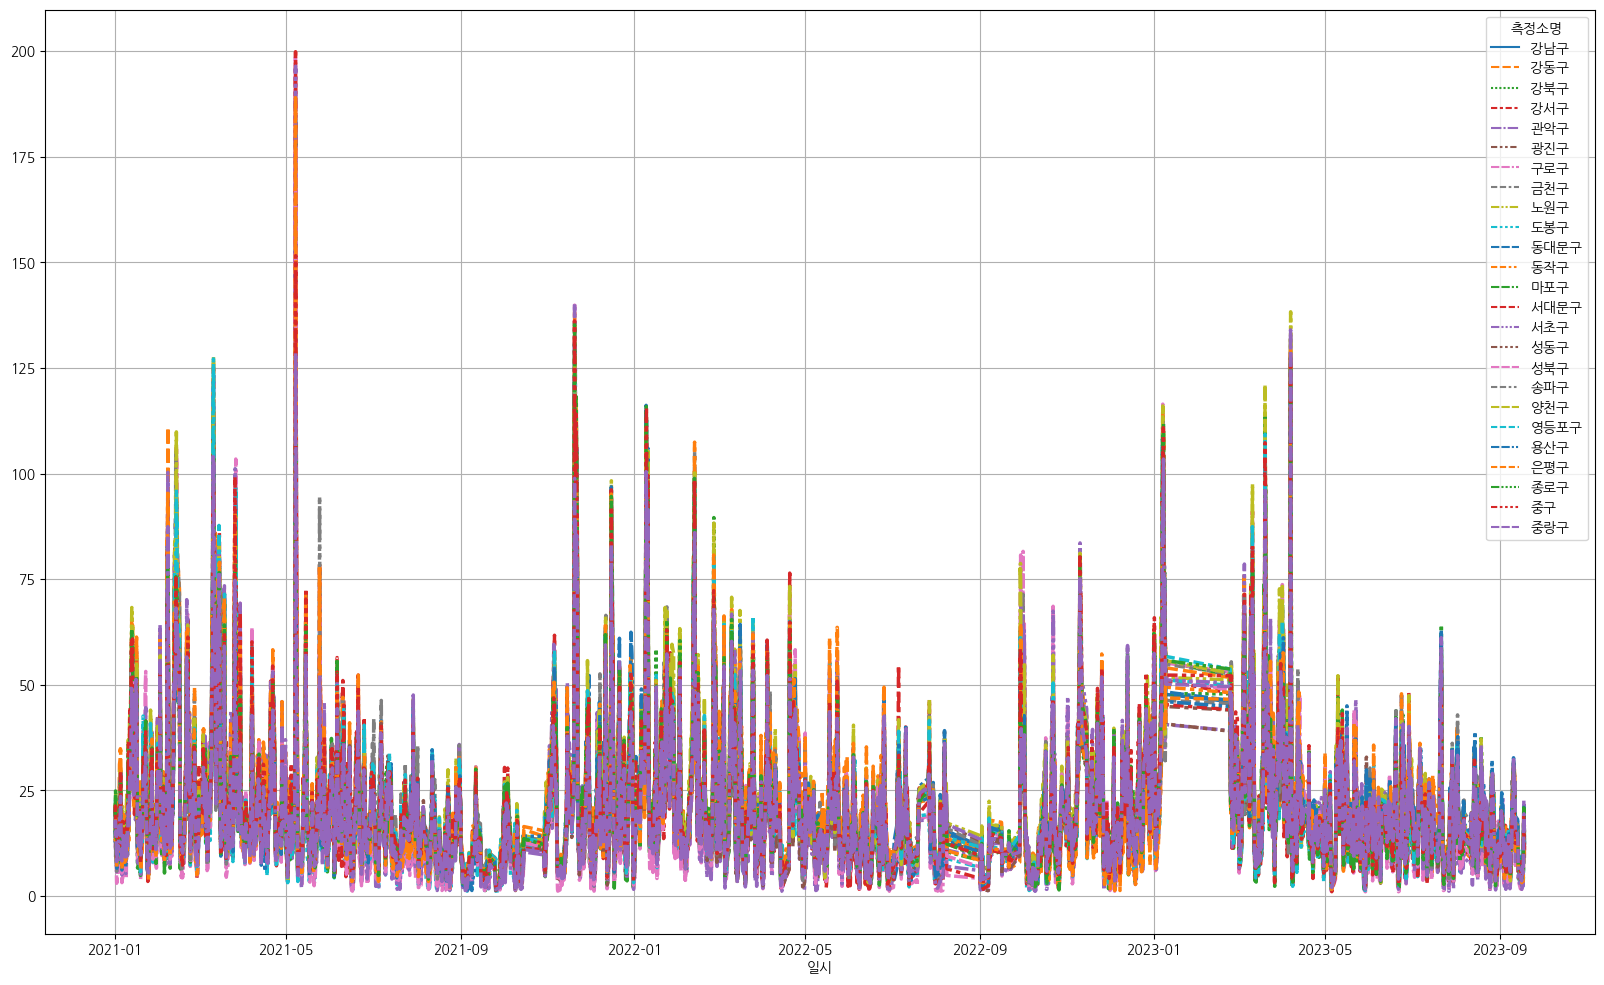

In [129]:
data = pvt1.rolling(7).mean()
f, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax = ax)
plt.grid()
plt.show()

In [130]:
grp2 = pd.DataFrame(total_df.groupby([total_df.측정소명, total_df.일시.dt.year, total_df.일시.dt.month])['PM'].mean())
grp2.index.names = ['측정소명', '연', '월']
grp2.reset_index(inplace = True)
grp2['연월'] = grp2.연.astype('str') + grp2.월.apply(lambda st: str(st).rjust(2, '0'))
grp2

,측정소명,연,월,PM,연월
0,강남구,2021,1,24.415385,202101
1,강남구,2021,2,30.975379,202102
2,강남구,2021,3,37.371324,202103
3,강남구,2021,4,21.660232,202104
4,강남구,2021,5,22.772816,202105
...,...,...,...,...,...
820,중랑구,2023,5,19.495622,202305
821,중랑구,2023,6,18.682883,202306
822,중랑구,2023,7,21.753213,202307
823,중랑구,2023,8,18.019651,202308


In [131]:
pvt2 = grp2.pivot(index = ['연월'], columns = '측정소명', values = 'PM')
pvt2.head()

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연월,,,,,,,,,,,,,,,,,,,,,
202101,24.415385,28.088462,23.817308,24.183044,19.366089,23.725000,22.350674,25.165385,27.540385,22.778420,...,22.909615,21.359615,21.161538,24.776493,23.025743,20.408478,20.559615,25.063584,24.940270,21.251923
202102,30.975379,33.672968,29.257089,32.332703,26.648956,29.200378,29.578748,33.396584,31.200378,28.675522,...,27.539773,26.570888,25.216319,32.479167,29.429924,26.189036,29.180266,29.642722,28.592803,27.903592
202103,37.371324,37.845872,34.328440,39.994465,31.508257,34.655046,39.145488,37.466912,33.258716,33.915285,...,36.588991,31.790441,32.005505,38.528545,38.117647,32.091743,36.456881,35.434862,35.405303,33.114180
202104,21.660232,22.758221,18.876209,20.475822,19.174419,20.343689,22.659574,21.245174,20.482625,19.429400,...,21.126294,18.676983,20.151163,19.848837,19.430502,19.442940,21.594961,20.739382,22.253385,18.630561
202105,22.772816,23.363813,19.808140,25.992233,22.147573,22.788760,26.341085,23.486220,22.416667,24.420543,...,21.994186,25.093204,23.740234,22.760700,21.759223,20.565891,27.463178,21.158915,24.930233,21.855750


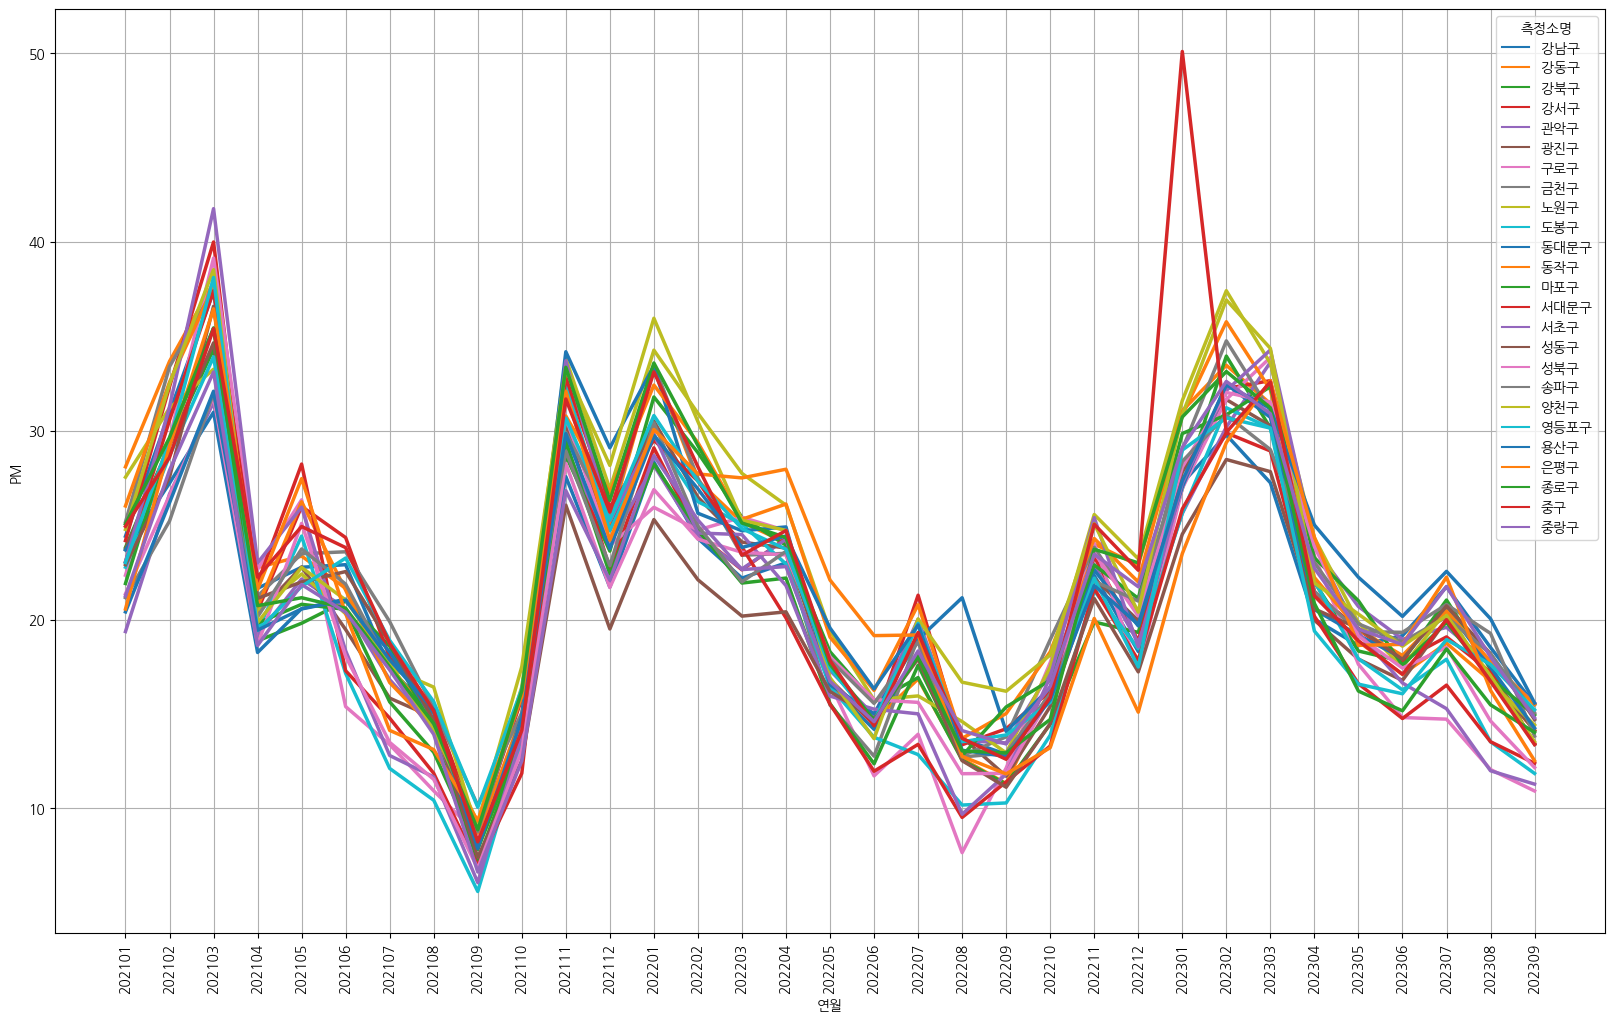

In [132]:
_, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=grp2, x='연월', y = 'PM', hue='측정소명',  palette="tab10", linewidth=2.5, ax = ax)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [133]:
grp1 = pd.DataFrame(total_df.groupby([total_df.측정소명, total_df.일시.dt.date])['PM'].mean())

grp1.index.names = ['측정소명', '일자']
grp1.reset_index(inplace = True)
grp1.일자 = pd.to_datetime(grp1.일자) 
grp1

,측정소명,일자,PM
0,강남구,2021-01-01,16.578947
1,강남구,2021-01-02,12.380952
2,강남구,2021-01-03,14.523810
3,강남구,2021-01-04,23.642857
4,강남구,2021-01-05,17.833333
...,...,...,...
24292,중랑구,2023-09-25,2.833333
24293,중랑구,2023-09-27,8.000000
24294,중랑구,2023-09-28,31.416667
24295,중랑구,2023-09-29,21.952381


In [134]:
grp1.일자 = pd.to_datetime(grp1.일자)
grp1.set_index(grp1.일자, inplace = True)
sub_df = grp1.loc['2023-01-01':'2023-02-28',:]
sub_df[sub_df.측정소명 == '중구']

,측정소명,일자,PM
일자,,,
2023-01-01,중구,2023-01-01,47.608696
2023-01-02,중구,2023-01-02,14.000000
2023-01-03,중구,2023-01-03,20.272727
2023-01-04,중구,2023-01-04,28.941176
2023-01-05,중구,2023-01-05,43.136364
2023-01-06,중구,2023-01-06,69.166667
2023-01-07,중구,2023-01-07,97.869565
2023-01-08,중구,2023-01-08,59.875000
2023-01-09,중구,2023-01-09,54.272727


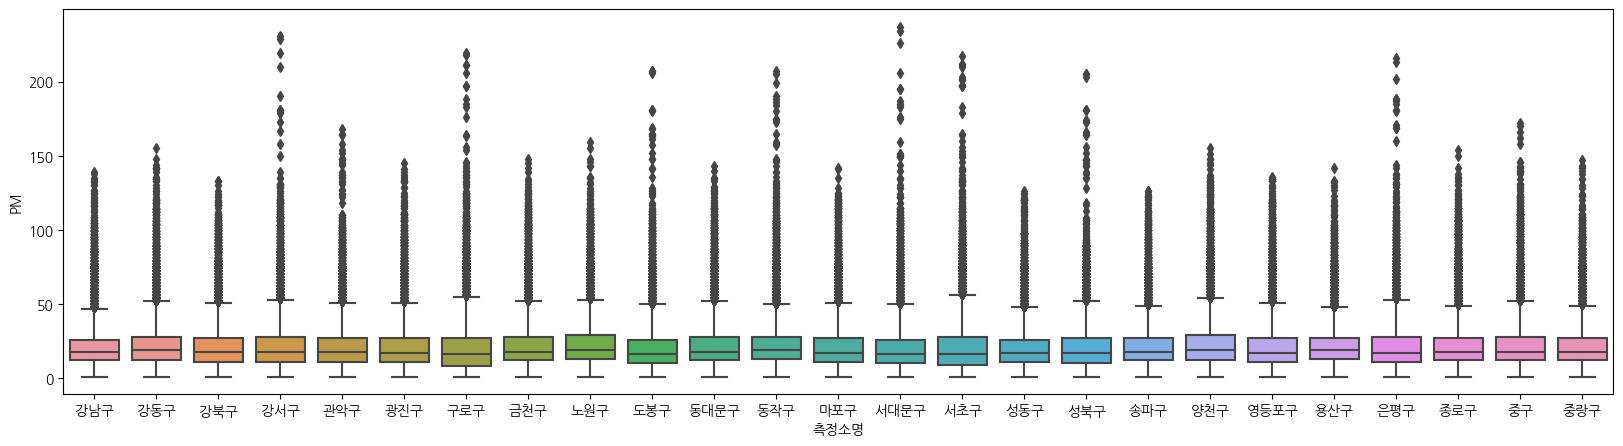

In [135]:
plt.figure(figsize=(20,5))
sns.boxplot(x = '측정소명', y = 'PM', data = total_df)
plt.show()

In [136]:
grp3 = pd.DataFrame(total_df.groupby('측정소명')['PM'].max())
grp3.PM = grp3.PM.round().astype('int')
grp3.reset_index(inplace = True)
print(grp3.sort_values('PM', ascending=False))

    측정소명   PM
13  서대문구  237
3    강서구  231
6    구로구  219
14   서초구  217
21   은평구  216
9    도봉구  207
11   동작구  207
16   성북구  205
23    중구  172
4    관악구  168
8    노원구  159
1    강동구  155
18   양천구  155
22   종로구  154
7    금천구  148
24   중랑구  147
5    광진구  145
10  동대문구  143
20   용산구  142
12   마포구  142
0    강남구  139
19  영등포구  136
2    강북구  133
17   송파구  126
15   성동구  126


In [137]:
grp3 = pd.DataFrame(total_df.groupby('측정소명')['PM'].median())
grp3.PM = grp3.PM.round().astype('int')
grp3.reset_index(inplace = True)
for pm in range(13, 18):
    print(pm, '-'*20)
    print(list(grp3[grp3.PM == pm]['측정소명']))

13 --------------------
[]
14 --------------------
[]
15 --------------------
[]
16 --------------------
['구로구', '도봉구', '서대문구', '서초구']
17 --------------------
['광진구', '마포구', '성동구', '성북구', '영등포구', '은평구']


In [138]:
corr1 = pvt1.corr()
corr1

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
측정소명,,,,,,,,,,,,,,,,,,,,,
강남구,1.000000,0.955165,0.920312,0.921868,0.924900,0.966957,0.910845,0.924879,0.916086,0.912294,...,0.971432,0.913342,0.939966,0.921072,0.938464,0.942677,0.900410,0.949919,0.949061,0.953420
강동구,0.955165,1.000000,0.921128,0.889590,0.891704,0.973519,0.882415,0.895446,0.937457,0.916344,...,0.939412,0.911708,0.930297,0.896970,0.903830,0.915000,0.876544,0.943125,0.928976,0.956480
강북구,0.920312,0.921128,1.000000,0.877988,0.885119,0.938117,0.858072,0.888750,0.950810,0.940557,...,0.918408,0.917540,0.904613,0.889103,0.897763,0.919202,0.908369,0.940828,0.928779,0.945408
강서구,0.921868,0.889590,0.877988,1.000000,0.929122,0.905993,0.938786,0.921376,0.878575,0.893388,...,0.914490,0.898458,0.883360,0.964939,0.951938,0.908059,0.907165,0.912162,0.928012,0.903769
관악구,0.924900,0.891704,0.885119,0.929122,1.000000,0.916006,0.933025,0.938072,0.888895,0.889520,...,0.919390,0.904111,0.902397,0.934644,0.934371,0.932466,0.903260,0.920746,0.929089,0.913927
광진구,0.966957,0.973519,0.938117,0.905993,0.916006,1.000000,0.901148,0.908139,0.943792,0.930210,...,0.956401,0.927873,0.940219,0.913943,0.921055,0.940692,0.903988,0.958845,0.947608,0.970494
구로구,0.910845,0.882415,0.858072,0.938786,0.933025,0.901148,1.000000,0.912841,0.872759,0.903096,...,0.903841,0.909839,0.882787,0.942368,0.931533,0.902305,0.907890,0.904939,0.920165,0.893310
금천구,0.924879,0.895446,0.888750,0.921376,0.938072,0.908139,0.912841,1.000000,0.882281,0.879819,...,0.909124,0.877238,0.893281,0.932289,0.930770,0.907718,0.886529,0.917191,0.919985,0.901541
노원구,0.916086,0.937457,0.950810,0.878575,0.888895,0.943792,0.872759,0.882281,1.000000,0.939341,...,0.907943,0.923666,0.907272,0.898999,0.895170,0.910841,0.887890,0.947206,0.931028,0.947049


In [139]:
corr1.강남구

측정소명
강남구     1.000000
강동구     0.955165
강북구     0.920312
강서구     0.921868
관악구     0.924900
광진구     0.966957
구로구     0.910845
금천구     0.924879
노원구     0.916086
도봉구     0.912294
동대문구    0.942579
동작구     0.948422
마포구     0.931227
서대문구    0.914436
서초구     0.936129
성동구     0.971432
성북구     0.913342
송파구     0.939966
양천구     0.921072
영등포구    0.938464
용산구     0.942677
은평구     0.900410
종로구     0.949919
중구      0.949061
중랑구     0.953420
Name: 강남구, dtype: float64

In [140]:
cutoff = 0.95

In [141]:
rslt = corr1[corr1['강남구'] > cutoff]['강남구']
cols = list(rslt.sort_values(ascending=False).index)
cols

['강남구', '성동구', '광진구', '강동구', '중랑구']

In [142]:
data = pvt1.loc[:,cols]
data

측정소명,강남구,성동구,광진구,강동구,중랑구
일시,,,,,
2021-01-01 00:00:00,12.0,11.0,13.0,17.0,12.0
2021-01-01 05:00:00,14.0,16.0,17.0,22.0,12.0
2021-01-01 06:00:00,18.0,18.0,16.0,22.0,18.0
2021-01-01 07:00:00,14.0,14.0,18.0,21.0,16.0
2021-01-01 08:00:00,14.0,14.0,18.0,24.0,19.0
...,...,...,...,...,...
2023-09-18 04:00:00,16.0,15.0,16.0,21.0,19.0
2023-09-18 05:00:00,15.0,15.0,16.0,15.0,15.0
2023-09-18 06:00:00,13.0,15.0,14.0,18.0,15.0


In [143]:
data.rename(columns={'강남구':'PM'}, inplace = True)
data

측정소명,PM,성동구,광진구,강동구,중랑구
일시,,,,,
2021-01-01 00:00:00,12.0,11.0,13.0,17.0,12.0
2021-01-01 05:00:00,14.0,16.0,17.0,22.0,12.0
2021-01-01 06:00:00,18.0,18.0,16.0,22.0,18.0
2021-01-01 07:00:00,14.0,14.0,18.0,21.0,16.0
2021-01-01 08:00:00,14.0,14.0,18.0,24.0,19.0
...,...,...,...,...,...
2023-09-18 04:00:00,16.0,15.0,16.0,21.0,19.0
2023-09-18 05:00:00,15.0,15.0,16.0,15.0,15.0
2023-09-18 06:00:00,13.0,15.0,14.0,18.0,15.0


In [144]:
cols = pvt1.columns
cols

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='측정소명')

In [145]:
cutoff = 0.93
for col in cols:
    rslt = corr1[corr1[col] > cutoff][col]
    col_list = list(rslt.sort_values(ascending=False).index)
    print(col, ' : ', col_list)

강남구  :  ['강남구', '성동구', '광진구', '강동구', '중랑구', '종로구', '중구', '동작구', '용산구', '동대문구', '송파구', '영등포구', '서초구', '마포구']
강동구  :  ['강동구', '광진구', '중랑구', '강남구', '종로구', '성동구', '노원구', '동대문구', '송파구']
강북구  :  ['강북구', '노원구', '중랑구', '종로구', '도봉구', '광진구', '동대문구']
강서구  :  ['강서구', '양천구', '영등포구', '마포구', '구로구', '동작구']
관악구  :  ['관악구', '동작구', '금천구', '양천구', '영등포구', '마포구', '구로구', '용산구', '서초구']
광진구  :  ['광진구', '강동구', '중랑구', '강남구', '종로구', '동대문구', '성동구', '중구', '노원구', '용산구', '송파구', '동작구', '강북구', '도봉구']
구로구  :  ['구로구', '서초구', '양천구', '강서구', '동작구', '관악구', '영등포구']
금천구  :  ['금천구', '동작구', '관악구', '양천구', '영등포구']
노원구  :  ['노원구', '강북구', '종로구', '중랑구', '광진구', '동대문구', '도봉구', '강동구', '중구']
도봉구  :  ['도봉구', '성북구', '서대문구', '강북구', '노원구', '은평구', '중구', '중랑구', '광진구']
동대문구  :  ['동대문구', '종로구', '중구', '광진구', '중랑구', '노원구', '강남구', '용산구', '강북구', '성동구', '강동구']
동작구  :  ['동작구', '관악구', '서초구', '강남구', '중구', '금천구', '광진구', '양천구', '종로구', '구로구', '영등포구', '강서구', '성동구', '중랑구', '서대문구']
마포구  :  ['마포구', '영등포구', '양천구', '중구', '강서구', '종로구', '용산구', '관악구', '강남구']
서대문구  

In [158]:
cutoff = 0.94
rslt = corr1[corr1['양천구'] > cutoff]['양천구']
cols = list(rslt.sort_values(ascending=False).index)
cols

['양천구', '영등포구', '강서구', '마포구', '구로구']

In [161]:
data2 = pvt1.loc[:,cols]
data2.rename(columns={'양천구':'PM'}, inplace = True)
data2

측정소명,PM,영등포구,강서구,마포구,구로구
일시,,,,,
2021-01-01 00:00:00,13.0,12.0,13.0,11.0,8.0
2021-01-01 05:00:00,13.0,9.0,12.0,10.0,12.0
2021-01-01 06:00:00,17.0,12.0,13.0,13.0,10.0
2021-01-01 07:00:00,15.0,14.0,13.0,13.0,11.0
2021-01-01 08:00:00,16.0,14.0,16.0,17.0,11.0
...,...,...,...,...,...
2023-09-18 04:00:00,14.0,17.0,15.0,12.0,13.0
2023-09-18 05:00:00,13.0,13.0,12.0,14.0,13.0
2023-09-18 06:00:00,13.0,10.0,13.0,14.0,8.0


In [162]:
data2.to_pickle('./data/data2.pkl')